In [2]:
#Import the library
import sqlite3
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt

import warnings
warnings.filterwarnings('ignore')

In [4]:
#Setting Connection
con_sql = sqlite3.connect('olist.db')

PRE PROCESSING

In [5]:
#Display List of Table from Database
query = """ SELECT name FROM sqlite_master WHERE type = 'table'; """
data = pd.read_sql(query, con_sql)
data

,name
0,olist_order_customer_dataset
1,olist_order_dataset
2,olist_order_reviews_dataset
3,olist_order_payments_dataset
4,olist_order_items_dataset
5,olist_products_dataset
6,olist_sellers_dataset
7,olist_geolocation_dataset
8,product_category_name_translation


In [6]:
#show customer data
query = """ SELECT  customer_id, customer_unique_id, customer_city FROM olist_order_customer_dataset;"""
customer = pd.read_sql(query, con_sql)
customer.info()
customer.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   customer_id         99441 non-null  object
 1   customer_unique_id  99441 non-null  object
 2   customer_city       99441 non-null  object
dtypes: object(3)
memory usage: 2.3+ MB


,customer_id,customer_unique_id,customer_city
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,franca
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,sao bernardo do campo
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,sao paulo
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,mogi das cruzes
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,campinas


In [7]:
#show order data
query = """ SELECT
    order_id,
    customer_id,
    order_purchase_timestamp
FROM olist_order_dataset
WHERE order_status <> 'canceled';
"""
order = pd.read_sql(query, con_sql)
order.info()
order.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98816 entries, 0 to 98815
Data columns (total 3 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   order_id                  98816 non-null  object
 1   customer_id               98816 non-null  object
 2   order_purchase_timestamp  98816 non-null  object
dtypes: object(3)
memory usage: 2.3+ MB


,order_id,customer_id,order_purchase_timestamp
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,2017-10-02 10:56:33
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,2018-07-24 20:41:37
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,2018-08-08 08:38:49
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,2017-11-18 19:28:06
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,2018-02-13 21:18:39


In [8]:
#convert to datetime
order['order_purchase_timestamp'] = pd.to_datetime(order['order_purchase_timestamp'])
order['month_purchase'] =order['order_purchase_timestamp'].dt.strftime('%Y-%m')
order['hour'] = order['order_purchase_timestamp'].dt.hour
order.info()
order.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98816 entries, 0 to 98815
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   order_id                  98816 non-null  object        
 1   customer_id               98816 non-null  object        
 2   order_purchase_timestamp  98816 non-null  datetime64[ns]
 3   month_purchase            98816 non-null  object        
 4   hour                      98816 non-null  int32         
dtypes: datetime64[ns](1), int32(1), object(3)
memory usage: 3.4+ MB


,order_id,customer_id,order_purchase_timestamp,month_purchase,hour
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,2017-10-02 10:56:33,2017-10,10
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,2018-07-24 20:41:37,2018-07,20
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,2018-08-08 08:38:49,2018-08,8
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,2017-11-18 19:28:06,2017-11,19
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,2018-02-13 21:18:39,2018-02,21


In [9]:
#query order item
query = """ SELECT 
    order_id,
    product_id,
    payment_type,
    payment_value AS total_revenue,
    payment_value - price AS total_profit
FROM olist_order_items_dataset
JOIN olist_order_payments_dataset USING(order_id);"""

order_items = pd.read_sql(query, con_sql)
order_items.info()
order_items.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117601 entries, 0 to 117600
Data columns (total 5 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   order_id       117601 non-null  object 
 1   product_id     117601 non-null  object 
 2   payment_type   117601 non-null  object 
 3   total_revenue  117601 non-null  float64
 4   total_profit   117601 non-null  float64
dtypes: float64(2), object(3)
memory usage: 4.5+ MB


,order_id,product_id,payment_type,total_revenue,total_profit
0,00010242fe8c5a6d1ba2dd792cb16214,4244733e06e7ecb4970a6e2683c13e61,credit_card,72.19,13.29
1,00018f77f2f0320c557190d7a144bdd3,e5f2d52b802189ee658865ca93d83a8f,credit_card,259.83,19.93
2,000229ec398224ef6ca0657da4fc703e,c777355d18b72b67abbeef9df44fd0fd,credit_card,216.87,17.87
3,00024acbcdf0a6daa1e931b038114c75,7634da152a4610f1595efa32f14722fc,credit_card,25.78,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,ac6c3623068f30de03045865e4e10089,credit_card,218.04,18.14


In [10]:
#query products data
query = """ SELECT
    product_id,
    product_category_name_english AS product_name
FROM product_category_name_translation
JOIN olist_products_dataset USING(product_category_name);
"""
products = pd.read_sql(query,con_sql)
products.info()
products.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32328 entries, 0 to 32327
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   product_id    32328 non-null  object
 1   product_name  32328 non-null  object
dtypes: object(2)
memory usage: 505.2+ KB


,product_id,product_name
0,00210e41887c2a8ef9f791ebc780cc36,health_beauty
1,0042f1a9a7e0edd1400c6cd0fda065f8,health_beauty
2,006619bbed68b000c8ba3f8725d5409e,health_beauty
3,00878d953636afec00d3e85d55a12e7f,health_beauty
4,008b0ec3de3638637099f97add750136,health_beauty


In [11]:
#merge table with order_id
orders = pd.merge(order, order_items, how='left', on='order_id')
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117647 entries, 0 to 117646
Data columns (total 9 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   order_id                  117647 non-null  object        
 1   customer_id               117647 non-null  object        
 2   order_purchase_timestamp  117647 non-null  datetime64[ns]
 3   month_purchase            117647 non-null  object        
 4   hour                      117647 non-null  int32         
 5   product_id                117035 non-null  object        
 6   payment_type              117035 non-null  object        
 7   total_revenue             117035 non-null  float64       
 8   total_profit              117035 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int32(1), object(5)
memory usage: 7.6+ MB


In [12]:
#merge table with customer_id
customer_orders = pd.merge(orders, customer, how='left', on='customer_id')
customer_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117647 entries, 0 to 117646
Data columns (total 11 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   order_id                  117647 non-null  object        
 1   customer_id               117647 non-null  object        
 2   order_purchase_timestamp  117647 non-null  datetime64[ns]
 3   month_purchase            117647 non-null  object        
 4   hour                      117647 non-null  int32         
 5   product_id                117035 non-null  object        
 6   payment_type              117035 non-null  object        
 7   total_revenue             117035 non-null  float64       
 8   total_profit              117035 non-null  float64       
 9   customer_unique_id        117647 non-null  object        
 10  customer_city             117647 non-null  object        
dtypes: datetime64[ns](1), float64(2), int32(1), object(7)
memory usag

In [13]:
#merge table with product_id
customer_orders_product = pd.merge(customer_orders, products, how='left', on='product_id')
customer_orders_product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117647 entries, 0 to 117646
Data columns (total 12 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   order_id                  117647 non-null  object        
 1   customer_id               117647 non-null  object        
 2   order_purchase_timestamp  117647 non-null  datetime64[ns]
 3   month_purchase            117647 non-null  object        
 4   hour                      117647 non-null  int32         
 5   product_id                117035 non-null  object        
 6   payment_type              117035 non-null  object        
 7   total_revenue             117035 non-null  float64       
 8   total_profit              117035 non-null  float64       
 9   customer_unique_id        117647 non-null  object        
 10  customer_city             117647 non-null  object        
 11  product_name              115329 non-null  object        
dtypes:

In [14]:
#final all join table
customer_orders_product.drop('product_id',axis=1,inplace=True)
customer_orders_product[['total_revenue']]
customer_orders_product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117647 entries, 0 to 117646
Data columns (total 11 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   order_id                  117647 non-null  object        
 1   customer_id               117647 non-null  object        
 2   order_purchase_timestamp  117647 non-null  datetime64[ns]
 3   month_purchase            117647 non-null  object        
 4   hour                      117647 non-null  int32         
 5   payment_type              117035 non-null  object        
 6   total_revenue             117035 non-null  float64       
 7   total_profit              117035 non-null  float64       
 8   customer_unique_id        117647 non-null  object        
 9   customer_city             117647 non-null  object        
 10  product_name              115329 non-null  object        
dtypes: datetime64[ns](1), float64(2), int32(1), object(7)
memory usag

DATA CLEANSING

In [16]:
#checking null values
missing = customer_orders_product.isnull().sum()[customer_orders_product.isnull().sum()>0]
missing_value = pd.DataFrame({'NaN_count':missing, 'NaN_percentage':missing/len(customer_orders_product)})
missing_value = missing_value.sort_values(by='NaN_percentage', ascending=False)
missing_value

,NaN_count,NaN_percentage
product_name,2318,0.019703
payment_type,612,0.005202
total_revenue,612,0.005202
total_profit,612,0.005202


In [17]:
#Mapping columns with nan values
columns_nan = [
    'product_name',
    'payment_type',
    'total_revenue',
    'total_profit'
]
print(f'Number of columns with NA values: {len(columns_nan)}')

Number of columns with NA values: 4


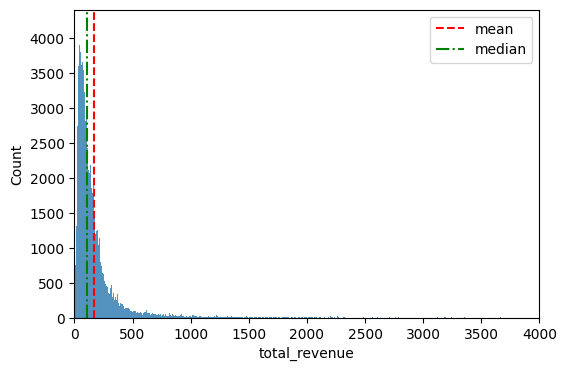

In [18]:
#hisplot of total_revenue column
plt.figure(figsize=(6, 4))
sns.histplot(data=customer_orders_product, x='total_revenue')
plt.axvline(x=customer_orders_product.total_revenue.mean(), color='r', linestyle='--', label='mean')
plt.axvline(x=customer_orders_product.total_revenue.median(), color='g', linestyle='-.', label='median')
plt.xlim(0,4000)
plt.legend()
plt.show()

In [19]:
#Fill the null values with mean
customer_orders_product['total_revenue'] = customer_orders_product['total_revenue'].fillna(customer_orders_product['total_revenue'].mean())

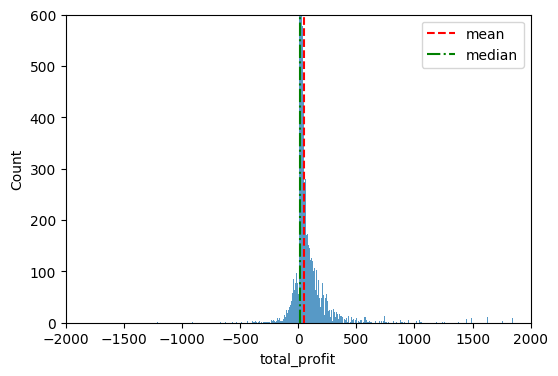

In [20]:
#histplot of total_profit column
plt.figure(figsize=(6, 4))
sns.histplot(data=customer_orders_product, x='total_profit')
plt.axvline(x=customer_orders_product.total_profit.mean(), color='r', linestyle='--', label='mean')
plt.axvline(x=customer_orders_product.total_profit.median(), color='g', linestyle='-.', label='median')
plt.xlim(-2000, 2000)
plt.ylim(0, 600)
plt.legend()
plt.show()

In [21]:
#Fill the null values with mean
customer_orders_product['total_profit'] = customer_orders_product['total_profit'].fillna(customer_orders_product['total_profit'].mean())

In [22]:
#Fill the missing value with unknown and modus
customer_orders_product['product_name'] = customer_orders_product['product_name'].fillna('unknown')
customer_orders_product['payment_type'] = customer_orders_product['payment_type'].fillna(customer_orders_product['payment_type'].mode()[0])

In [23]:
customer_orders_product.isna().sum()

order_id                    0
customer_id                 0
order_purchase_timestamp    0
month_purchase              0
hour                        0
payment_type                0
total_revenue               0
total_profit                0
customer_unique_id          0
customer_city               0
product_name                0
dtype: int64

REDUNDANT VALUE

In [24]:
#Checking redundant values
customer_orders_product[customer_orders_product.duplicated(keep=False)].head(10)

,order_id,customer_id,order_purchase_timestamp,month_purchase,hour,payment_type,total_revenue,total_profit,customer_unique_id,customer_city,product_name
13,e6ce16cb79ec1d90b1da9085a6118aeb,494dded5b201313c64ed7f100595b95c,2017-05-16 19:41:10,2017-05,19,credit_card,259.06,160.06,f2a85dec752b8517b5e58a06ff3cd937,rio de janeiro,garden_tools
14,e6ce16cb79ec1d90b1da9085a6118aeb,494dded5b201313c64ed7f100595b95c,2017-05-16 19:41:10,2017-05,19,credit_card,259.06,160.06,f2a85dec752b8517b5e58a06ff3cd937,rio de janeiro,garden_tools
59,9faeb9b2746b9d7526aef5acb08e2aa0,79183cd650e2bb0d475b0067d45946ac,2018-07-26 14:39:59,2018-07,14,credit_card,151.04,91.04,c77154776ead8e798c2d684205938f71,porto alegre,sports_leisure
60,9faeb9b2746b9d7526aef5acb08e2aa0,79183cd650e2bb0d475b0067d45946ac,2018-07-26 14:39:59,2018-07,14,credit_card,151.04,91.04,c77154776ead8e798c2d684205938f71,porto alegre,sports_leisure
65,66e4624ae69e7dc89bd50222b59f581f,684fa6da5134b9e4dab731e00011712d,2018-03-09 14:50:15,2018-03,14,credit_card,91.68,68.69,ddf60e20e6e262e2136801ce5cd628b0,aracaju,telephony
66,66e4624ae69e7dc89bd50222b59f581f,684fa6da5134b9e4dab731e00011712d,2018-03-09 14:50:15,2018-03,14,credit_card,91.68,68.69,ddf60e20e6e262e2136801ce5cd628b0,aracaju,telephony
75,f271576bed568e896f99eb710cd3a6f8,5dda11942d4f77bee3a46d71e442aec4,2018-01-07 21:44:54,2018-01,21,credit_card,824.76,494.86,6a0e43f0d7e1b5539e4c58a26ebe35da,boninal,construction_tools_construction
76,f271576bed568e896f99eb710cd3a6f8,5dda11942d4f77bee3a46d71e442aec4,2018-01-07 21:44:54,2018-01,21,credit_card,824.76,494.86,6a0e43f0d7e1b5539e4c58a26ebe35da,boninal,construction_tools_construction
78,68e48e68da1f50f7c5838ea75e3a20dd,4afc1dcca5fe8926fc97d60a4497f8ab,2018-06-18 16:02:23,2018-06,16,credit_card,392.60,307.70,a464f750556546a0989d9326ec003ccf,sao paulo,auto
79,68e48e68da1f50f7c5838ea75e3a20dd,4afc1dcca5fe8926fc97d60a4497f8ab,2018-06-18 16:02:23,2018-06,16,credit_card,392.60,307.70,a464f750556546a0989d9326ec003ccf,sao paulo,auto


In [25]:
#Drop the redundant value
customer_orders_product.drop_duplicates(keep='first', inplace=True, ignore_index=True)

CHECKING OUTLIER

In [26]:
#Checking the outliers
customer_orders_product.describe()

,order_purchase_timestamp,hour,total_revenue,total_profit
count,105392,105392.000000,105392.000000,105392.000000
mean,2017-12-30 10:25:39.175506688,14.783095,157.066515,32.229639
min,2016-09-04 21:15:19,0.000000,0.000000,-3763.560000
25%,2017-09-11 11:28:21,11.000000,58.180000,13.070000
50%,2018-01-17 16:46:11.500000,15.000000,102.920000,17.060000
75%,2018-05-03 22:09:30.500000,19.000000,175.080000,26.430000
max,2018-09-03 09:06:57,23.000000,13664.080000,11984.080000
std,NaN,5.335734,216.284187,100.949521


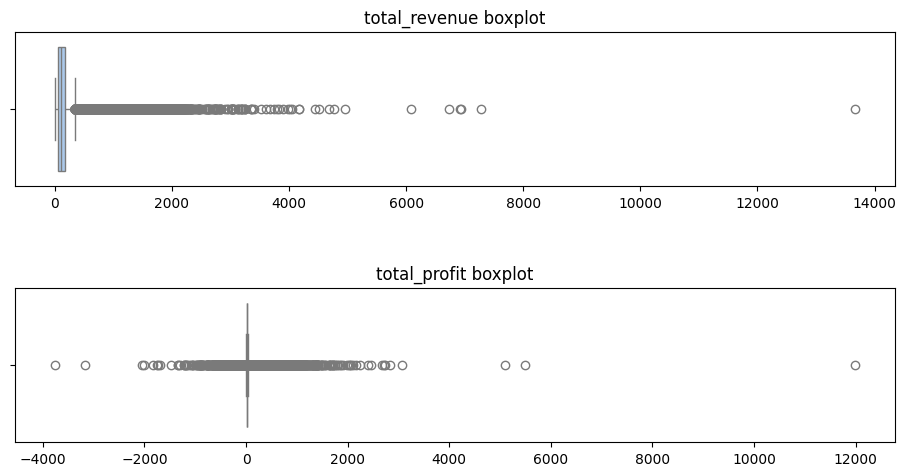

In [27]:
#SHOW BOXPLOT
columns = ['total_revenue','total_profit']
n = 1

plt.figure(figsize=(10,8))

for x in columns:
    plt.subplot(3,1,n)
    sns.boxplot(data=customer_orders_product, x=x ,palette='pastel')
    plt.xlabel(None)
    plt.title(f'{x} boxplot')
    n += 1

plt.tight_layout(pad=4)
plt.show()

In [29]:
def detect_outliers_iqr(data):
    outliers = []
    data = sorted(data)
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)
    print(f'lower:{lwr_bound} and upper:{upr_bound}')

    for i in data:
        if (i<lwr_bound or i>upr_bound): outliers.append(i)
    return outliers

In [30]:
outlier_col = ['total_revenue','total_profit']

for col in outlier_col:
    outlier = detect_outliers_iqr(customer_orders_product[col])

    print('number of outliers in column', f"'{str(col)}'",'is',len(outlier))
    print()

lower:-117.17000000000002 and upper:350.43000000000006
number of outliers in column 'total_revenue' is 8138

lower:-6.970000000000017 and upper:46.47000000000001
number of outliers in column 'total_profit' is 21356



In [35]:
def capping_outlier(col):
    lower_limit = customer_orders_product[col].quantile(0.02)
    upper_limit = customer_orders_product[col].quantile(0.98)

    print(str(col))
    print(f'lower:{lower_limit} and upper:{upper_limit}')
    print()

    customer_orders_product[col] = np.where(customer_orders_product[col]>upper_limit,upper_limit,
                                     np.where(customer_orders_product[col]<lower_limit,lower_limit,customer_orders_product[col]))

for col in outlier_col:
    capping_outlier(col)

total_revenue
lower:16.649352 and upper:751.05

total_profit
lower:-58.879999999999995 and upper:229.71097199999994



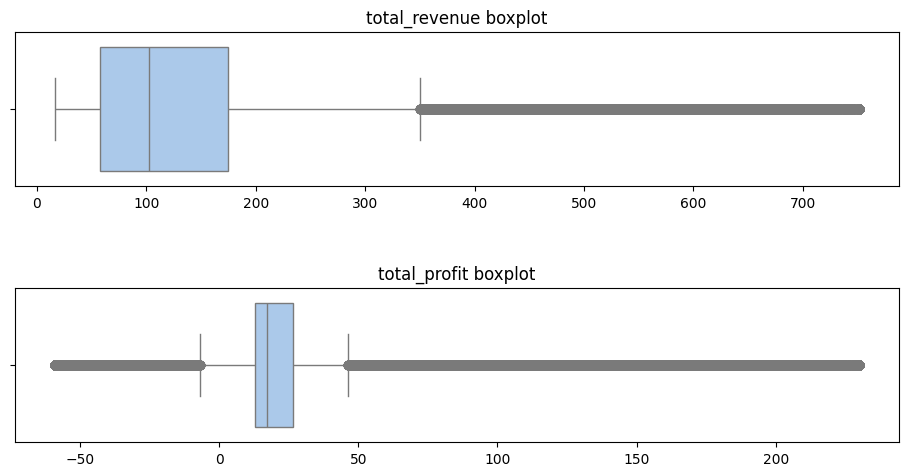

In [36]:
#Check the outlier again from boxplot 
columns = ['total_revenue','total_profit']
n = 1

plt.figure(figsize=(10,8))

for x in columns:
    plt.subplot(3,1,n)
    sns.boxplot(data=customer_orders_product, x=x ,palette='pastel')
    plt.xlabel(None)
    plt.title(f'{x} boxplot')
    n += 1

plt.tight_layout(pad=4)
plt.show()

In [39]:
#Check after capping outliers
print(customer_orders_product['total_revenue'].describe())
print('______________________________________________')
print(customer_orders_product['total_profit'].describe())

count    105392.000000
mean        147.206616
std         143.760619
min          16.649352
25%          58.180000
50%         102.920000
75%         175.080000
max         751.050000
Name: total_revenue, dtype: float64
______________________________________________
count    105392.000000
mean         29.825028
std          46.284264
min         -58.880000
25%          13.070000
50%          17.060000
75%          26.430000
max         229.710972
Name: total_profit, dtype: float64


Exploratory Data Analysis (EDA)

In [45]:
monthly_sales = customer_orders_product.groupby('month_purchase')['total_revenue'].sum()
monthly_profit = customer_orders_product.groupby('month_purchase')['total_profit'].sum()
best_month_index = monthly_sales.idxmax()
best_month_revenue = monthly_sales.loc[best_month_index]
best_month_profit = monthly_profit.loc[best_month_index]

In [47]:
print(best_month_index)
print(best_month_revenue)
print(best_month_profit)

2017-11
1177337.2227382914
251607.01264718757


In [42]:
#What is the best month of sales and how much the profit?
print(monthly_sales.sum())
print(monthly_profit.sum())

15514399.674965886
3143319.3248429624


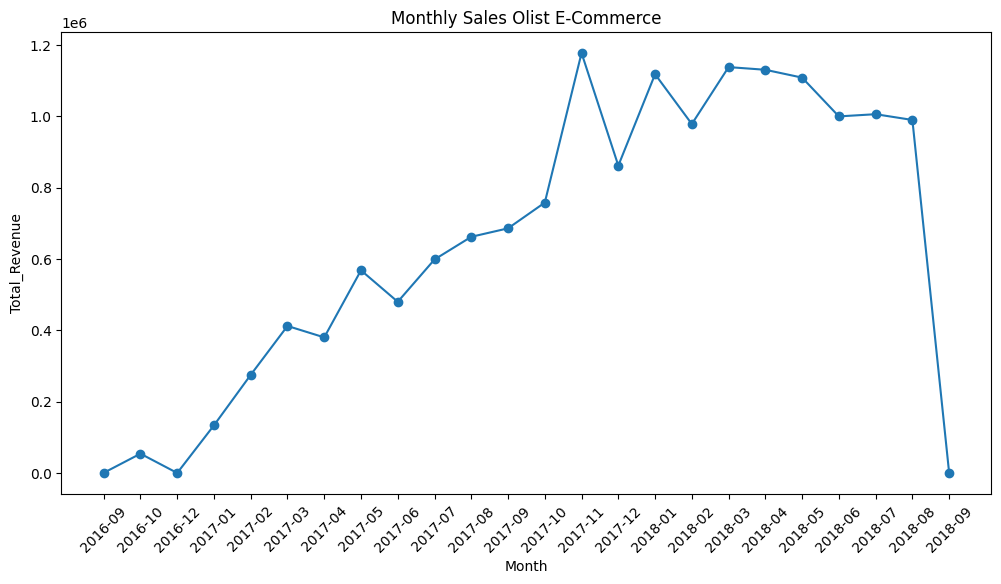

In [48]:
plt.figure(figsize=(12,6))
plt.plot(monthly_sales.index, monthly_sales.values, marker='o')
plt.xlabel('Month')
plt.ylabel('Total_Revenue')
plt.title('Monthly Sales Olist E-Commerce')
plt.xticks(rotation=45)
plt.show()

Product health_beauty is the best product sales with the revenue is $1394226


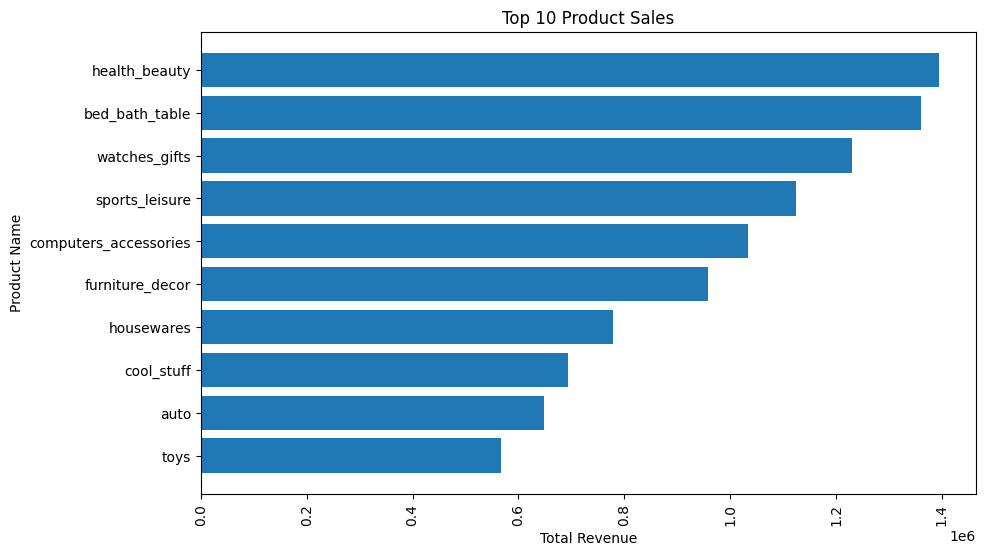

In [50]:
#What is the top 10 product sales from olist e-commerce?

top_10_prod = customer_orders_product[['product_name','total_revenue']].groupby(['product_name']).sum().sort_values(by=['total_revenue'], ascending=False).head(10)
top_10_prod = top_10_prod.reset_index()
top_10_prod = top_10_prod.iloc[::-1]
best_product = top_10_prod.loc[0,'product_name']
best_product_revenue = top_10_prod.loc[0,'total_revenue']
print(f'Product {best_product} is the best product sales with the revenue is ${best_product_revenue:.0f}')

plt.figure(figsize=(10,6))
plt.barh(top_10_prod['product_name'],top_10_prod['total_revenue'])
plt.title('Top 10 Product Sales')
plt.ylabel('Product Name')
plt.xlabel('Total Revenue')
plt.xticks(rotation=90)
plt.show()

Most product name that customer spend much money is computers


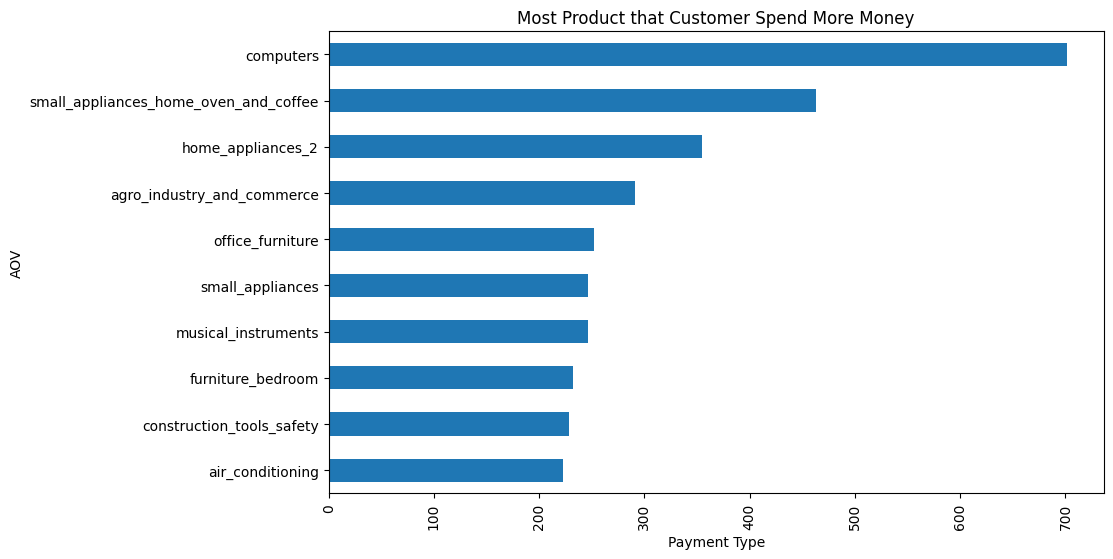

In [51]:
product = customer_orders_product.groupby('product_name')['total_revenue'].sum()
order_count = customer_orders_product['product_name'].value_counts()
aov = (product/order_count).sort_values(ascending=False).head(10)
#aov_filter = aov.drop('unknown', errors='ignore')
print(f'Most product name that customer spend much money is {aov.index[0]}')

plt.figure(figsize=(10,6))
aov.sort_values(ascending=True).plot(kind='barh')
plt.title('Most Product that Customer Spend More Money')
plt.ylabel('AOV')
plt.xlabel('Payment Type')
plt.xticks(rotation=90)
plt.show()

Most payment type that customer use is credit_card


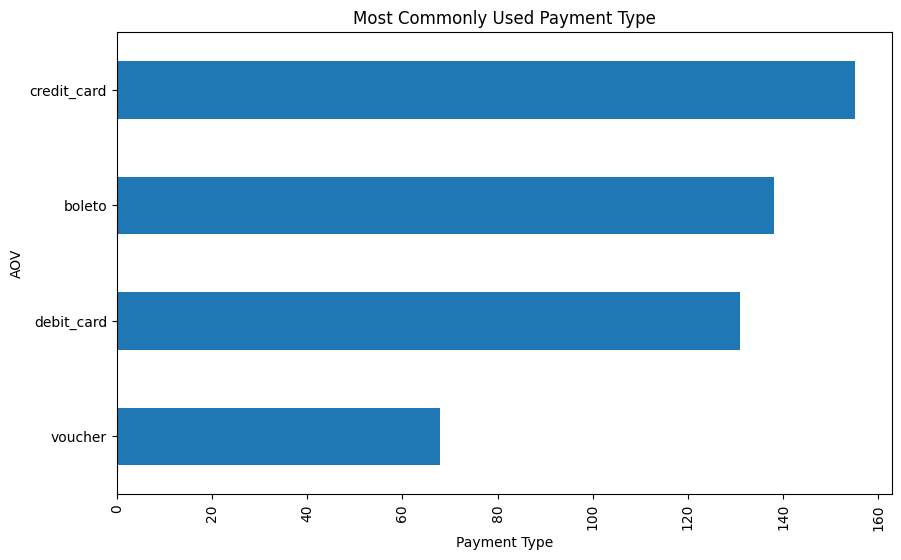

In [52]:
#What is the most payment type that customer use by the aov (average order value)?


#AOV
payment = customer_orders_product.groupby('payment_type')['total_revenue'].sum()
order_count = customer_orders_product['payment_type'].value_counts()
aov = (payment/order_count).sort_values(ascending=False)
aov_filter = aov.drop('unknown', errors='ignore')
print(f'Most payment type that customer use is {aov.index[0]}')

plt.figure(figsize=(10,6))
aov_filter.sort_values(ascending=True).plot(kind='barh')
plt.title('Most Commonly Used Payment Type')
plt.ylabel('AOV')
plt.xlabel('Payment Type')
plt.xticks(rotation=90)
plt.show()

sao paulo is the highest city with count of product sales with total order 16459


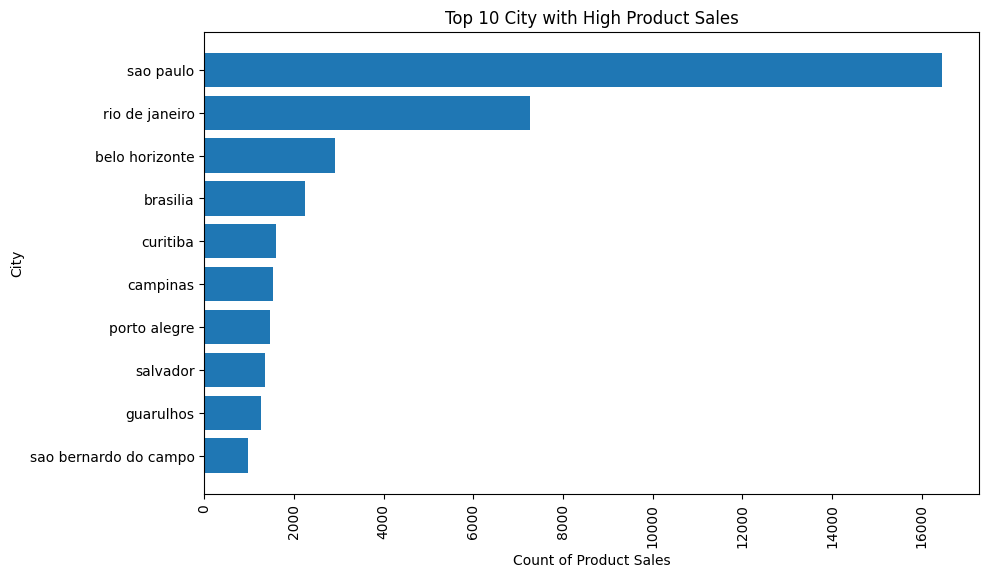

In [53]:
#What is top 10 city with high product sales?


top_10_city = customer_orders_product[['customer_city','order_id']].groupby(['customer_city']).count().sort_values(by=['order_id'], ascending=False).head(10)
top_10_city = top_10_city.reset_index()
top_10_city = top_10_city.iloc[::-1]
best_city = top_10_city.loc[0,'customer_city']
best_city_sales = top_10_city.loc[0,'order_id']
print(f'{best_city} is the highest city with count of product sales with total order {best_city_sales}')

plt.figure(figsize=(10,6))
plt.barh(top_10_city['customer_city'],top_10_city['order_id'])
plt.title('Top 10 City with High Product Sales')
plt.ylabel('City')
plt.xlabel('Count of Product Sales')
plt.xticks(rotation=90)
plt.show()

hour
16    7090
11    6950
14    6944
13    6881
15    6800
Name: order_id, dtype: int64


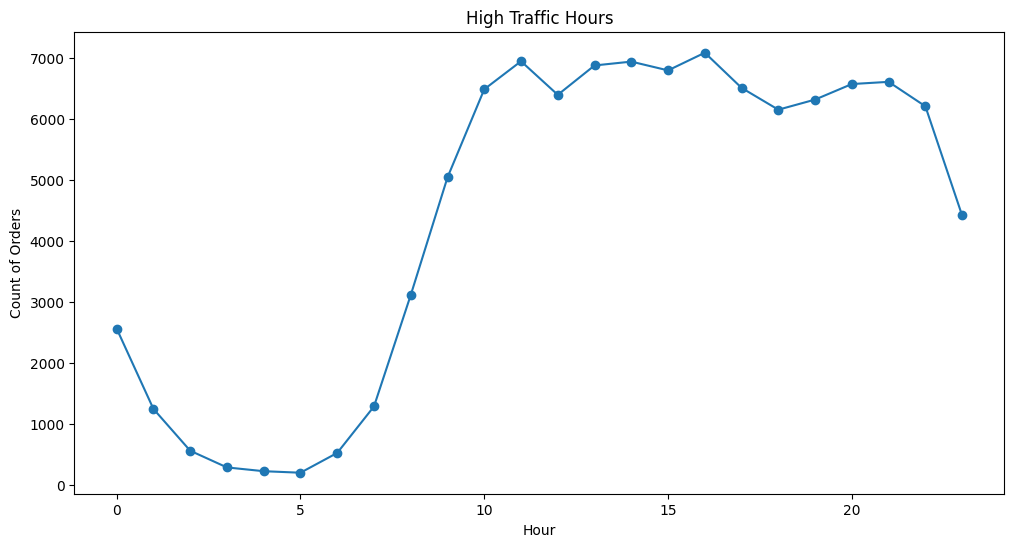

In [54]:
#What time we should display the product?

hours = customer_orders_product.groupby('hour')['order_id'].count()
print(hours.sort_values(ascending=False).head(5))

plt.figure(figsize=(12,6))
plt.plot(hours.index, hours.values, marker='o')
plt.xlabel('Hour')
plt.ylabel('Count of Orders')
plt.title('High Traffic Hours')
plt.show()

Recency, Frequency, Monetary (RFM) Analysis

In [56]:
#Recency
#Define current date
current_date = customer_orders_product['order_purchase_timestamp'].max()+dt.timedelta(days = 1)
print(f'Current date is : {current_date}')
print('-'*30)

#Obtain the date of the most recent purchase in a new df
recency = customer_orders_product.groupby(['customer_unique_id'], as_index=False)['order_purchase_timestamp'].max()

#Obtain recency value for each customer
recency['recency'] = recency['order_purchase_timestamp'].apply(lambda x:(current_date - x).days)
recency.head()

Current date is : 2018-09-04 09:06:57
------------------------------


,customer_unique_id,order_purchase_timestamp,recency
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10 10:56:27,116
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07 11:11:27,119
2,0000f46a3911fa3c0805444483337064,2017-03-10 21:05:03,542
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12 20:29:41,326
4,0004aac84e0df4da2b147fca70cf8255,2017-11-14 19:45:42,293


In [57]:
#Frequency
#Obtain the number of unique orders by customer
freq = pd.DataFrame(customer_orders_product.groupby(['customer_unique_id'], as_index=False).agg({'order_id':'nunique'}))

#Rename column
freq.rename({'order_id':'frequency'},axis=1, inplace=True)
freq.head()

,customer_unique_id,frequency
0,0000366f3b9a7992bf8c76cfdf3221e2,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1
2,0000f46a3911fa3c0805444483337064,1
3,0000f6ccb0745a6a4b88665a16c9f078,1
4,0004aac84e0df4da2b147fca70cf8255,1


In [58]:
#Monetary
#Calculate payment value group by cust_id
monetary = customer_orders_product.groupby('customer_unique_id', as_index=False)['total_revenue'].sum()

#Rename column
monetary.rename({'total_revenue':'monetary'},axis=1, inplace=True)
monetary.head()

,customer_unique_id,monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,141.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,27.19
2,0000f46a3911fa3c0805444483337064,86.22
3,0000f6ccb0745a6a4b88665a16c9f078,43.62
4,0004aac84e0df4da2b147fca70cf8255,196.89


In [59]:
#Data Preparation RFM
rfm = recency.merge(freq, on='customer_unique_id')
rfm = rfm.merge(monetary, on='customer_unique_id')
rfm.head()

,customer_unique_id,order_purchase_timestamp,recency,frequency,monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10 10:56:27,116,1,141.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07 11:11:27,119,1,27.19
2,0000f46a3911fa3c0805444483337064,2017-03-10 21:05:03,542,1,86.22
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12 20:29:41,326,1,43.62
4,0004aac84e0df4da2b147fca70cf8255,2017-11-14 19:45:42,293,1,196.89


In [60]:
rfm.drop('order_purchase_timestamp', axis=1, inplace=True)
rfm.head()

,customer_unique_id,recency,frequency,monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,116,1,141.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,119,1,27.19
2,0000f46a3911fa3c0805444483337064,542,1,86.22
3,0000f6ccb0745a6a4b88665a16c9f078,326,1,43.62
4,0004aac84e0df4da2b147fca70cf8255,293,1,196.89


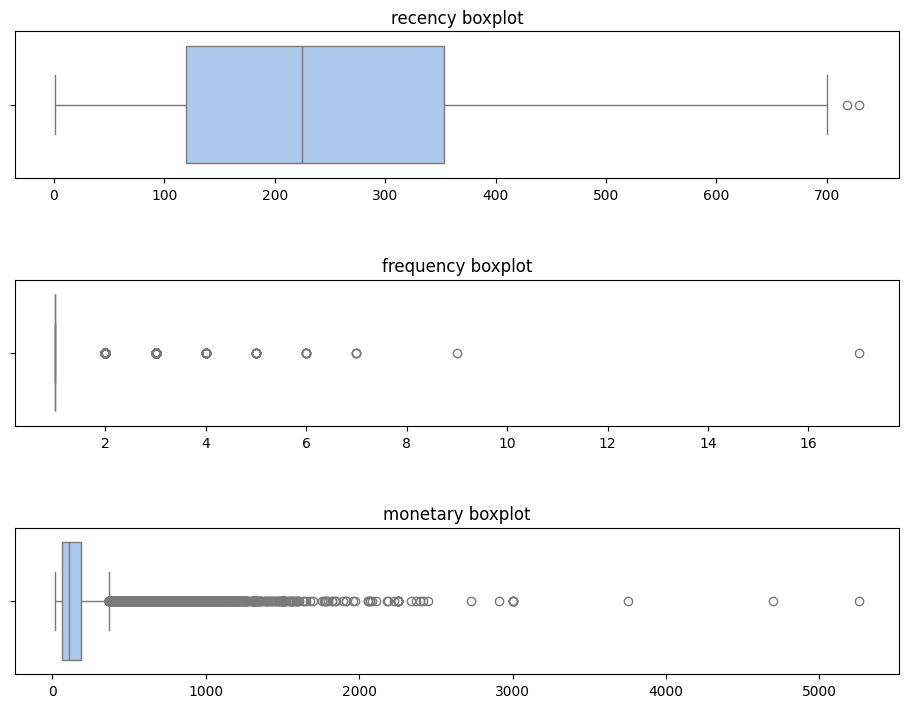

In [61]:
#Checking Outlier in RFM Datawith boxplot
columns = ['recency','frequency','monetary']
n = 1

plt.figure(figsize=(10,8))

for x in columns:
    plt.subplot(3,1,n)
    sns.boxplot(data=rfm, x=x ,palette='pastel')
    plt.xlabel(None)
    plt.title(f'{x} boxplot')
    n += 1

plt.tight_layout(pad=4)
plt.show()

In [62]:
#Remove the outlier
def remove_outlier(input, column_name):
    q1 = input[column_name].quantile(0.25)
    q3 = input[column_name].quantile(0.75)
    iqr = q3-q1
    minbound = q1-1.5*iqr
    maxbound = q3+1.5*iqr
    idx_outliers = input.loc[(input[column_name]<minbound) | 
                             (input[column_name]>maxbound)].index
    input = pd.DataFrame(input.drop(idx_outliers.to_list(), axis=0, inplace=True))
    return input

#Apply the function to the outlier columns
for i in ['recency','frequency','monetary']:
    remove_outlier(rfm, i)

In [63]:
#Do RFM Anaysis (Make the copy from RFM dataframe)
rfm2 = rfm.copy()
rfm2 = rfm2.set_index('customer_unique_id')
rfm2

,recency,frequency,monetary
customer_unique_id,,,
0000366f3b9a7992bf8c76cfdf3221e2,116,1,141.90
0000b849f77a49e4a4ce2b2a4ca5be3f,119,1,27.19
0000f46a3911fa3c0805444483337064,542,1,86.22
0000f6ccb0745a6a4b88665a16c9f078,326,1,43.62
0004aac84e0df4da2b147fca70cf8255,293,1,196.89
...,...,...,...
fffbf87b7a1a6fa8b03f081c5f51a201,250,1,167.32
fffea47cd6d3cc0a88bd621562a9d061,267,1,84.58
ffff371b4d645b6ecea244b27531430a,573,1,112.46


In [64]:
#discretize variables into equal_sized bucket
#recency & monetary
rfm2['recency_score'] = pd.qcut(rfm2['recency'], 5, labels=[5,4,3,2,1])
rfm2['monetary_score'] = pd.qcut(rfm2['monetary'], 5, labels=[1,2,3,4,5])

#frequency
rfm2['frequency_score'] = pd.qcut(rfm2['frequency'].rank(method='first'), 5, labels=[1,2,3,4,5])
#Concatenate all scores
rfm2['rfm_scores'] = rfm2.recency_score.astype(str) + rfm2.frequency_score.astype(str) + rfm2.monetary_score.astype(str)
rfm2.head()

,recency,frequency,monetary,recency_score,monetary_score,frequency_score,rfm_scores
customer_unique_id,,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,116,1,141.90,4,4,1,414
0000b849f77a49e4a4ce2b2a4ca5be3f,119,1,27.19,4,1,1,411
0000f46a3911fa3c0805444483337064,542,1,86.22,1,3,1,113
0000f6ccb0745a6a4b88665a16c9f078,326,1,43.62,2,1,1,211
0004aac84e0df4da2b147fca70cf8255,293,1,196.89,2,5,1,215


In [65]:
#Maping the rfm scores

map = {
    r'111|112|121|131|141|151': 'Lost customers',
    r'332|322|233|232|223|222|132|123|122|212|211': 'Hibernating customers', 
    r'155|154|144|214|215|115|114|113': 'Cannot Lose Them',
    r'255|254|245|244|253|252|243|242|235|234|225|224|153|152|145|143|142|135|134|133|125|124': 'At Risk',
    r'331|321|312|221|213|231|241|251': 'About To Sleep',
    r'535|534|443|434|343|334|325|324': 'Need Attention',
    r'525|524|523|522|521|515|514|513|425|424|413|414|415|315|314|313': 'Promising',
    r'512|511|422|421|412|411|311': 'New Customers',
    r'553|551|552|541|542|533|532|531|452|451|442|441|431|453|433|432|423|353|352|351|342|341|333|323': 'Potential Loyalist',
    r'543|444|435|355|354|345|344|335': 'Loyal',
    r'555|554|544|545|454|455|445': 'Champions'
}

rfm2['segmentation'] = rfm2['rfm_scores'].replace(map, regex=True)
rfm2.head()

,recency,frequency,monetary,recency_score,monetary_score,frequency_score,rfm_scores,segmentation
customer_unique_id,,,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,116,1,141.90,4,4,1,414,Promising
0000b849f77a49e4a4ce2b2a4ca5be3f,119,1,27.19,4,1,1,411,New Customers
0000f46a3911fa3c0805444483337064,542,1,86.22,1,3,1,113,Cannot Lose Them
0000f6ccb0745a6a4b88665a16c9f078,326,1,43.62,2,1,1,211,Hibernating customers
0004aac84e0df4da2b147fca70cf8255,293,1,196.89,2,5,1,215,Cannot Lose Them


In [66]:
#Creating RFM Stat
rfm_stat = rfm2[['segmentation','recency','frequency','monetary']].groupby('segmentation').agg(['mean','median','min','max','count'])
rfm_stat['ratio'] = (100*rfm_stat['recency']['count']/rfm_stat['recency']['count'].sum()).round(2)
rfm_stat

recency                         frequency         \
                             mean median  min  max  count      mean median   
segmentation                                                                 
About To Sleep         285.113977  283.0  185  390   5273       1.0    1.0   
At Risk                393.379681  377.0  275  700  14794       1.0    1.0   
Cannot Lose Them       442.329495  446.0  275  700   5384       1.0    1.0   
Champions               91.332587   87.0    6  184   4910       1.0    1.0   
Hibernating customers  348.311484  333.0  185  700   7567       1.0    1.0   
Lost customers         482.253403  476.0  391  700   4187       1.0    1.0   
Loyal                  184.427619  200.0    5  274   5402       1.0    1.0   
Need Attention         162.509165  185.0    6  274   5401       1.0    1.0   
New Customers          128.872606  133.0    5  274   4647       1.0    1.0   
Potential Loyalist     136.636745  137.0    5  274  16198       1.0    1.0   
Promising              112.092653   99.0    5  274  10998       1.0    1.0   

                                        monetary                               \
                      min max  count        mean   median         min     max   
segmentation                                                                    
About To Sleep          1   1   5273   49.186005   43.000   16.649352  117.85   
At Risk                 1   1  14794  148.326972  133.345   52.490000  356.54   
Cannot Lose Them        1   1   5384  173.516792  157.350   79.930000  356.12   
Champions               1   1   4910  196.918884  183.250  117.880000  356.11   
Hibernating customers   1   1   7567   72.336752   69.540   16.649352  117.85   
Lost customers          1   1   4187   42.869693   41.640   16.649352   79.71   
Loyal                   1   1   5402  185.352283  173.840   80.020000  356.24   
Need Attention          1   1   5401  154.452550  141.730   79.800000  356.45   
New Customers           1   1   4647   49.923654   48.300   16.649352   79.72   
Potential Loyalist      1   1  16198   67.297657   65.350   16.649352  117.85   
Promising               1   1  10998  149.993299  138.720   16.649352  356.53   

                              ratio  
                       count         
segmentation                         
About To Sleep          5273   6.22  
At Risk                14794  17.45  
Cannot Lose Them        5384   6.35  
Champions               4910   5.79  
Hibernating customers   7567   8.93  
Lost customers          4187   4.94  
Loyal                   5402   6.37  
Need Attention          5401   6.37  
New Customers           4647   5.48  
Potential Loyalist     16198  19.11  
Promising              10998  12.98

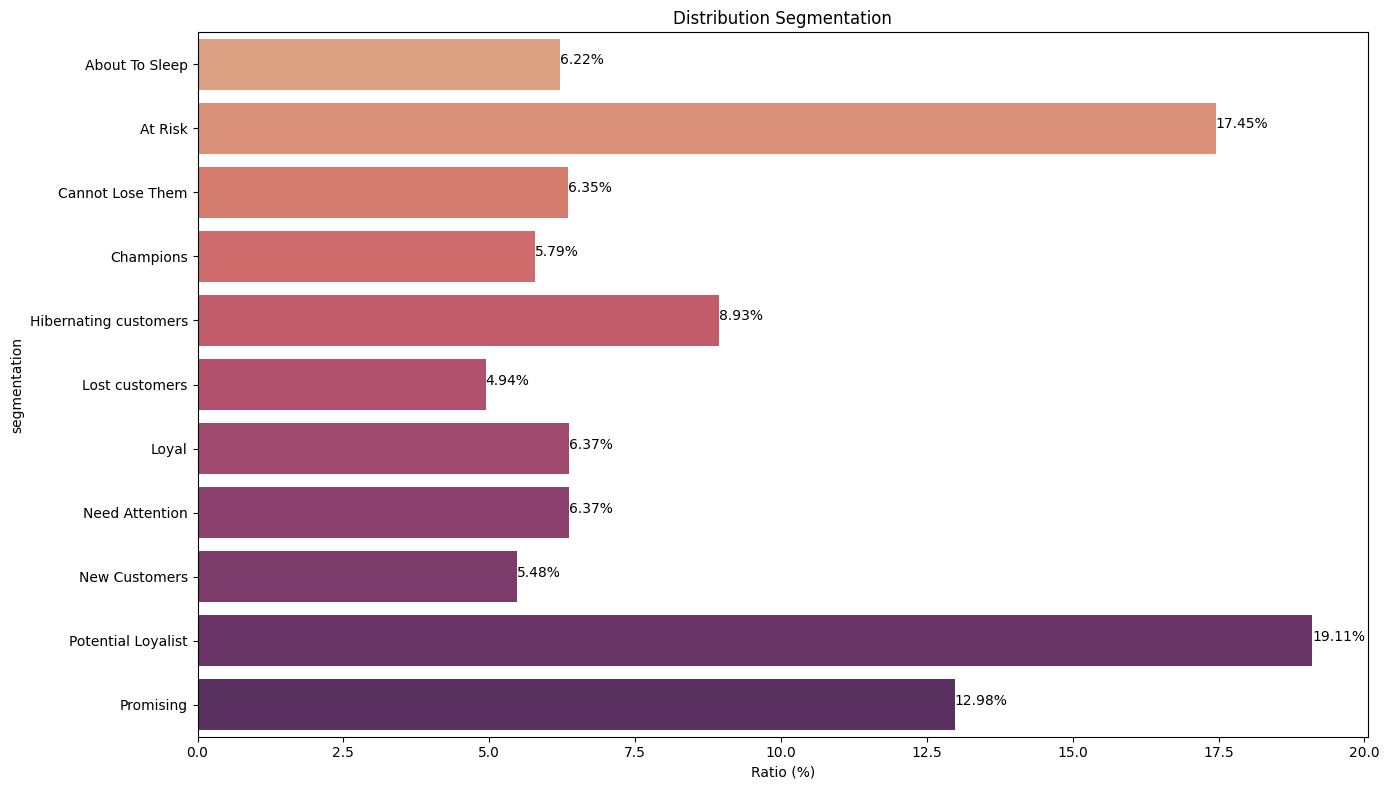

In [67]:
#Visualize the RFM to know Customer Segmentation
plt.figure(figsize=(14,8))

plot = sns.barplot(x='ratio', y=rfm_stat.index, 
                   data = rfm_stat, palette='flare')

for i, v in enumerate(rfm_stat['ratio']):
    plot.text(v, i, f'{v}%', color='black', ha='left')

plt.title('Distribution Segmentation')
plt.xlabel('Ratio (%)')
plt.tight_layout()
